
## 🖼️ Procesamiento de Imágenes: Dataset MNIST
### Guía paso a paso sin redes neuronales

### 1. Descarga y Carga del Dataset
# Usaremos `sklearn` para cargar el dataset digits (similar a MNIST pero más simple)

In [23]:
# %%
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
digits = load_digits()
print("Dataset cargado exitosamente!")

Dataset cargado exitosamente!


In [24]:
# Ver estructura del dataset
print(f"\nTipo de dato: {type(digits)}")
print(f"Número de imágenes: {len(digits.images)}")
print(f"Tamaño de cada imagen: {digits.images[0].shape}")
print(f"Formato de las imágenes: {digits.images.shape}")
print(f"Formato de las etiquetas: {digits.target.shape}")


Tipo de dato: <class 'sklearn.utils._bunch.Bunch'>
Número de imágenes: 1797
Tamaño de cada imagen: (8, 8)
Formato de las imágenes: (1797, 8, 8)
Formato de las etiquetas: (1797,)


###*En este primer proceso se usó una herramienta de la librería scikit-learn llamada load_digits, la cual nos permite acceder a un conjunto de datos que contiene miles de imágenes pequeñas de números escritos a mano que van del 0 al 9. Cada imagen no es una foto como la que veríamos normalmente, sino que está representada como una matriz de 8 por 8 cuadritos (píxeles), y dentro de cada cuadrito hay un número que indica qué tan oscuro o claro es ese punto en escala de grises. Lo importante de este paso es que con una sola línea de código logramos descargar y tener disponibles tanto las imágenes como las etiquetas (que son los números reales que esas imágenes representan). Para comprobar que todo se cargó de manera correcta, se imprimió un mensaje en la pantalla confirmando que el dataset ya estaba listo para ser utilizado en los siguientes procesos, asegurando así que la información con la que íbamos a trabajar era válida y confiable.* ⚡💎




## 2. Inspección de los Datos
# Veamos cómo son los datos internamente


# Mostrar algunos ejemplos de datos crudos

In [25]:

print("Primeras 3 imágenes (formato plano):")
print(digits.images[:3].reshape(3, -1))

print("\nEtiquetas correspondientes:")
print(digits.target[:3])


Primeras 3 imágenes (formato plano):
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

Etiquetas correspondientes:
[0 1 2]


### **Una vez que los datos estaban cargados, lo siguiente fue revisar cómo venían organizados y qué características tenían. Para eso se imprimieron detalles como la cantidad total de imágenes que trae el conjunto, el tamaño de cada una de ellas, el formato en que se almacenan y la forma en que se guardan las etiquetas. También se mostraron algunos ejemplos de cómo lucen los datos cuando no están en forma de imagen, sino como vectores de números en fila. Este proceso es muy importante porque nos permite asegurarnos de que todo esté en orden antes de seguir adelante, ya que si los datos estuvieran incompletos o mal organizados, los resultados de los análisis siguientes no serían correctos. Además, esta inspección inicial nos ayuda a entender que aunque lo que queremos ver son dígitos escritos a mano, la computadora lo único que tiene son números organizados en matrices y vectores que luego se pueden transformar en imágenes.** ☝😬


## 3. Visualización de Imágenes
# Veamos cómo se ven realmente las imágenes


# Función para mostrar múltiples imágenes

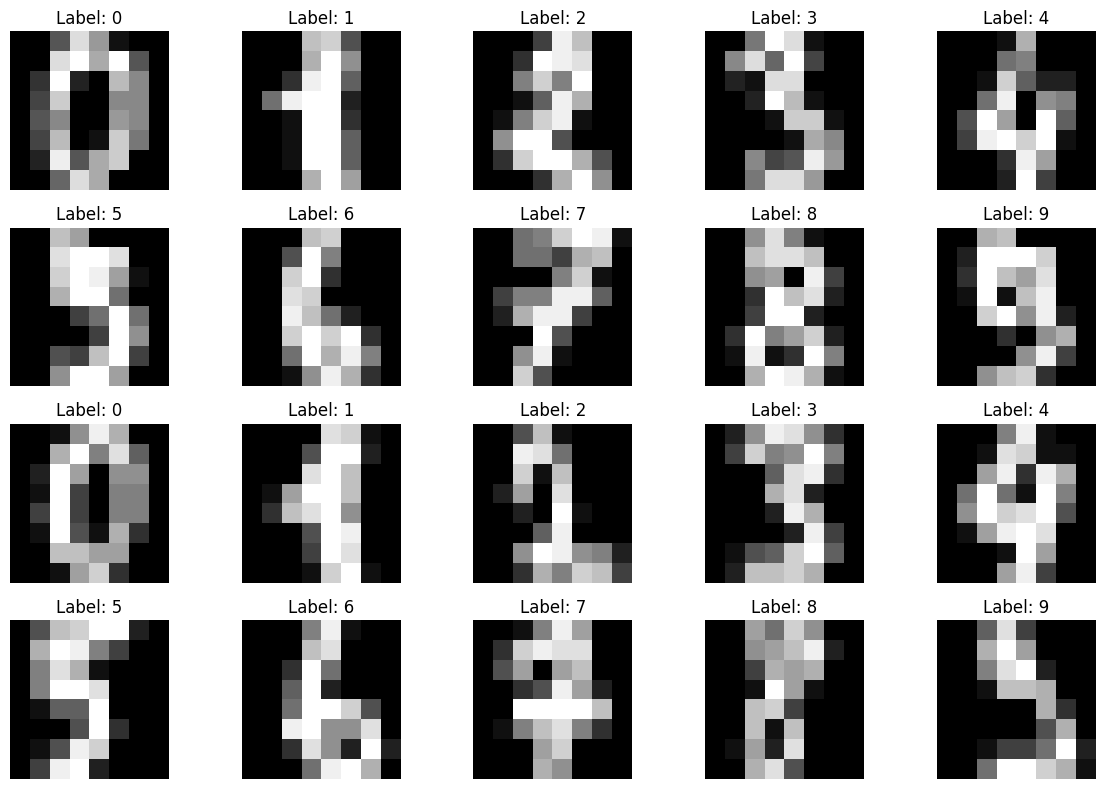

In [26]:
def plot_digits(images, labels, n_rows=4, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(f"Label: {labels[i]}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar primeras 20 imágenes
plot_digits(digits.images, digits.target)

### `Una vez entendida la estructura del dataset, se mostraron algunas imágenes en su formato numérico plano, es decir, como arreglos de valores enteros que representan los niveles de intensidad de cada píxel. También se desplegaron las etiquetas correspondientes a esas imágenes, que indican qué número representan. Este procedimiento tiene como propósito ilustrar cómo están almacenadas las imágenes internamente en el sistema, destacando que aunque para nosotros son dígitos visibles, para la computadora solo son matrices de números que deben interpretarse. Esta forma de ver los datos en crudo ayuda a reforzar la comprensión de cómo se representan las imágenes digitalmente y con ello tambien tener la nocion de ver algo no tan visible pero con el simple hecho de tener algun rasgo notorio` 😦👌

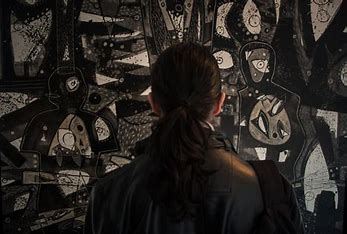

## 4. Análisis Estadístico Básico
Veamos algunas propiedades interesantes de las imágenes

# Calcular promedio de píxeles por dígito

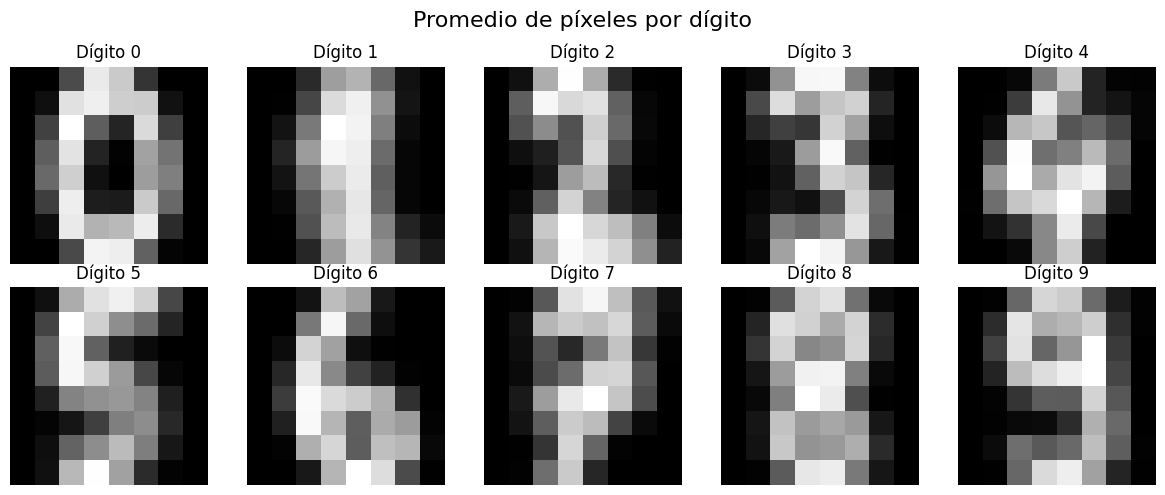

In [27]:
digit_means = {}
for digit in range(10):
    digit_imgs = digits.images[digits.target == digit]
    digit_means[digit] = np.mean(digit_imgs, axis=0)

# Mostrar promedios
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for digit, ax in zip(range(10), axes.flat):
    ax.imshow(digit_means[digit], cmap='gray')
    ax.set_title(f"Dígito {digit}")
    ax.axis('off')
plt.suptitle("Promedio de píxeles por dígito", fontsize=16)
plt.tight_layout()
plt.show()

### **Después de ver los ejemplos individuales, se pasó a un análisis más general con el objetivo de entender qué tienen en común las imágenes de cada número. Para eso se agruparon todas las imágenes que pertenecían al mismo dígito y se calculó un promedio de la intensidad de los píxeles. El resultado fue una imagen representativa para cada número, en donde las zonas más oscuras indicaban los trazos más frecuentes que suelen aparecer en ese dígito. Por ejemplo, el promedio del número “0” mostró un contorno circular más claro, mientras que el promedio del “1” dejó ver una línea vertical como trazo principal. Este procedimiento fue muy útil porque nos permitió obtener una especie de “plantilla” de cada número, mostrando cómo se suelen escribir en general, y nos dio una visión más completa de los patrones comunes en los datos.** ✅ ⛏

## 5. Preprocesamiento Básico
Vamos a realizar algunas operaciones comunes sin redes neuronales


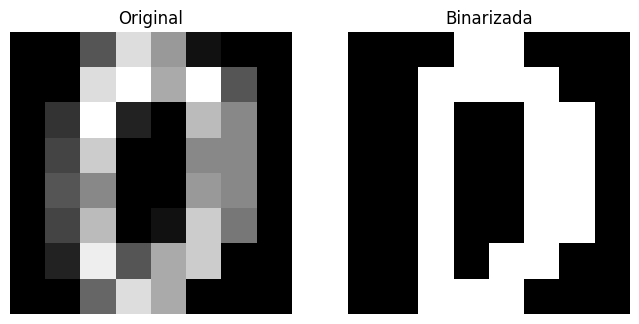

In [28]:
from skimage.filters import threshold_otsu
from skimage.transform import resize

# Ejemplo: Umbralización (binarización)
def binarize_image(img, threshold=None):
    """Convierte imagen a blanco y negro"""
    if threshold is None:
        threshold = threshold_otsu(img)
    return img > threshold

# Aplicar a una imagen de muestra
sample_img = digits.images[0]
binary_img = binarize_image(sample_img)

# Mostrar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Original")
ax1.axis('off')

ax2.imshow(binary_img, cmap='gray')
ax2.set_title("Binarizada")
ax2.axis('off')
plt.show()

### *Una vez comprendidas las características generales de los dígitos, se aplicaron técnicas de preprocesamiento que sirven para mejorar la calidad de las imágenes y facilitar el trabajo de los algoritmos. Una de estas técnicas fue la binarización con el método de Otsu, que consiste en calcular automáticamente un valor de corte para separar los píxeles claros (fondo) de los oscuros (trazo del número). De esta forma, las imágenes quedan más limpias, con un contraste más definido entre la figura y el fondo. Este tipo de preprocesamiento es importante porque elimina variaciones de iluminación o ruido en los datos, haciendo que todas las imágenes sean más uniformes y más fáciles de analizar para los modelos de reconocimiento.* 🔢💊

## 6. Extracción de Características
Sin redes neuronales, podemos extraer características manuales


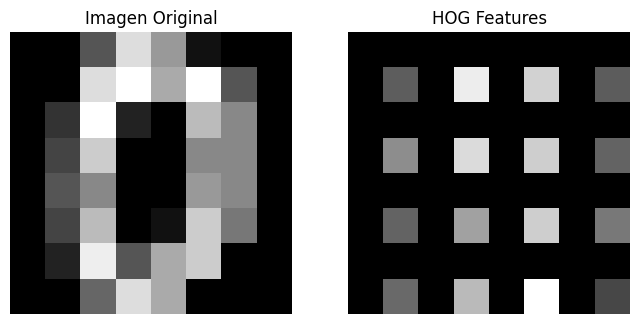

In [29]:
# %%
from skimage.feature import hog
from skimage.measure import moments, moments_hu

# Extraer HOG features (Histogram of Oriented Gradients)
def extract_hog_features(image):
    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(2, 2),
        cells_per_block=(1, 1),
        visualize=True,
        block_norm='L2-Hys'
    )
    return fd, hog_image

# Aplicar a una imagen
hog_feat, hog_img = extract_hog_features(sample_img)

# Mostrar HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Imagen Original")
ax1.axis('off')

ax2.imshow(hog_img, cmap='gray')
ax2.set_title("HOG Features")
ax2.axis('off')
plt.show()

### `Con las imágenes ya preprocesadas, se aplicó una técnica llamada HOG (Histogram of Oriented Gradients o Histograma de Gradientes Orientados), que transforma cada imagen en un conjunto de características que describen los bordes y la forma de los dígitos. Lo que hace HOG es detectar hacia dónde van las líneas y los bordes de cada número, generando un vector que resume esta información en lugar de trabajar con la imagen completa. Esto es muy útil porque permite que los modelos de clasificación se concentren en los contornos y estructuras esenciales de cada dígito, en vez de en detalles irrelevantes. Al final, este proceso produce datos más compactos pero muy representativos que se pueden usar directamente para entrenar algoritmos de reconocimiento de número` 🧘⛳

## 7. Transformaciones Geométricas
Rotación, escalado, traslación

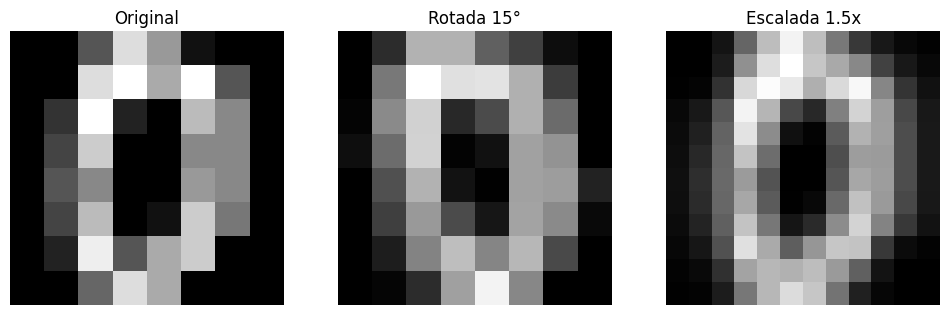

In [30]:
from skimage.transform import rotate, rescale

# Rotar imagen
rotated = rotate(sample_img, angle=15)

# Escalar imagen
scaled = rescale(sample_img, scale=1.5)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(sample_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(rotated, cmap='gray')
axes[1].set_title("Rotada 15°")
axes[1].axis('off')

axes[2].imshow(scaled, cmap='gray')
axes[2].set_title("Escalada 1.5x")
axes[2].axis('off')
plt.show()

### **En este proceso se aplicaron transformaciones geométricas a las imágenes, como rotaciones y cambios de tamaño. Esto tiene dos propósitos principales: el primero es normalizar las imágenes para que todas tengan una orientación y tamaño más uniforme, y el segundo es aumentar artificialmente la cantidad de datos disponibles (lo que se conoce como data augmentation). Por ejemplo, al rotar un poco un número “7” o al hacerlo más grande o pequeño, generamos nuevas versiones de la misma imagen sin cambiar su etiqueta, y eso ayuda a que un modelo aprenda a reconocer el dígito incluso si está escrito con inclinación o con diferente tamaño. De esta manera se logra que los algoritmos sean más robustos y tengan mejor desempeño en situaciones reales.** 🎢⏪

## 8. Detección de Bordes
Usando operadores como Sobel

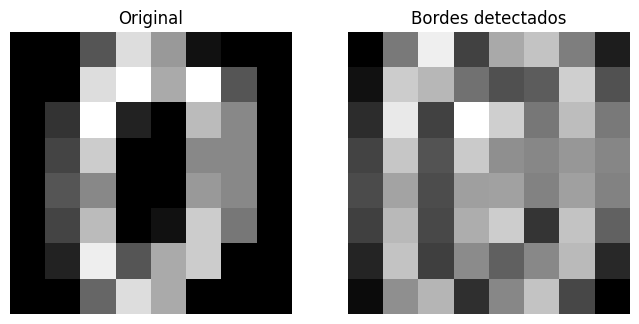

In [31]:
# %%
from skimage.filters import sobel

# Detectar bordes con Sobel
edges = sobel(sample_img)

# Mostrar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Original")
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title("Bordes detectados")
ax2.axis('off')
plt.show()

### **Otro procedimiento aplicado fue la detección de bordes, que consiste en resaltar las zonas donde hay cambios bruscos de intensidad, es decir, los contornos del número. Para esto se utilizó un filtro llamado Sobel, que es muy efectivo para identificar los bordes principales en una imagen. El resultado fue un nuevo conjunto de imágenes donde lo más visible eran los contornos de los números, como si fueran siluetas resaltadas. Esto es muy valioso porque los bordes contienen gran parte de la información necesaria para distinguir un número de otro, y además ayudan a simplificar los datos eliminando detalles innecesarios del interior de los trazos.** ⛹😠

## 9. Ejercicios Prácticos
Ahora tú puedes probar:

In [32]:
# ### Ejercicio 1:
# Crea una función que calcule el número de píxeles blancos (valor alto) en cada imagen y compara con la etiqueta real

# %%
def count_white_pixels(img):
    """Cuenta píxeles con valor alto (casi blanco)"""
    return np.sum(img > 15)  # Umbral arbitrario

# Probar con algunas imágenes
for i in range(5):
    white_count = count_white_pixels(digits.images[i])
    print(f"Imagen {i}: {white_count} píxeles blancos, etiqueta: {digits.target[i]}")

Imagen 0: 0 píxeles blancos, etiqueta: 0
Imagen 1: 11 píxeles blancos, etiqueta: 1
Imagen 2: 7 píxeles blancos, etiqueta: 2
Imagen 3: 0 píxeles blancos, etiqueta: 3
Imagen 4: 5 píxeles blancos, etiqueta: 4


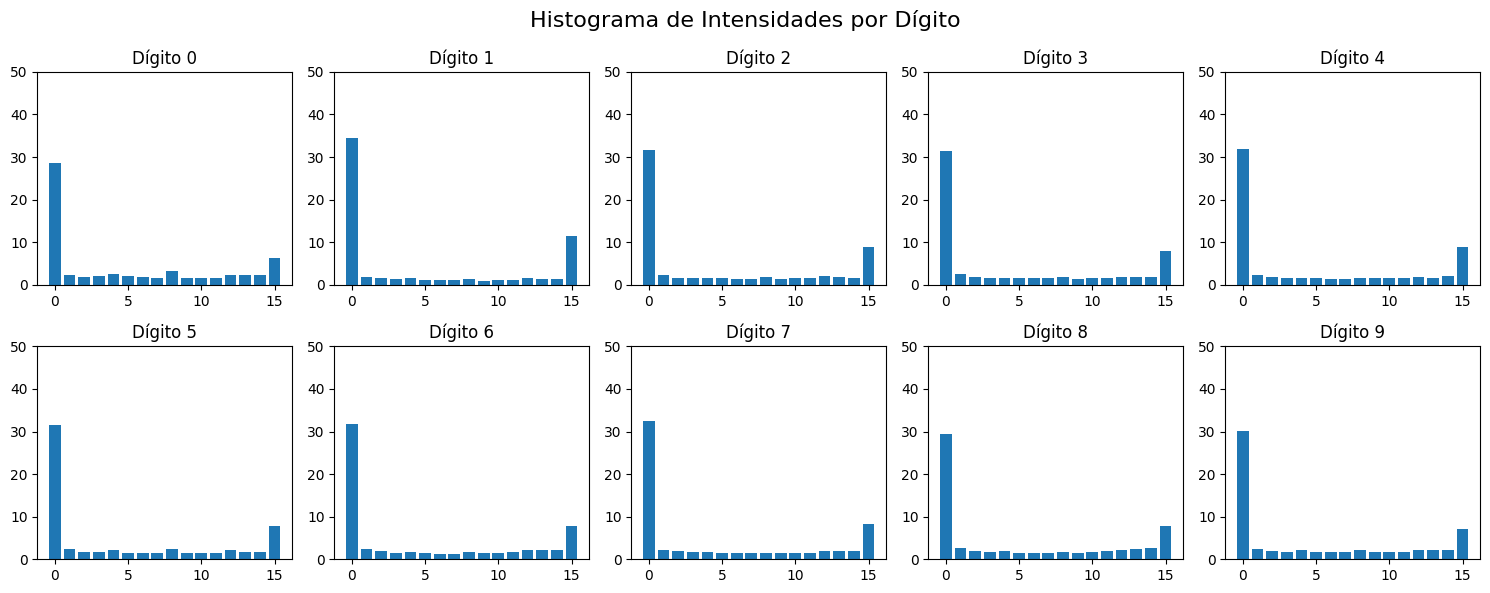

In [33]:
# ### Ejercicio 3:
# Calcula y visualiza el histograma de intensidades para cada dígito

# %%
# Crear figura con subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for digit in range(10):
    digit_imgs = digits.images[digits.target == digit]
    # Promediar histogramas de todas las imágenes del dígito
    hist_sum = np.zeros(16)
    for img in digit_imgs:
        hist, _ = np.histogram(img.ravel(), bins=16, range=(0, 16))
        hist_sum += hist

    axes[digit].bar(range(16), hist_sum / len(digit_imgs))
    axes[digit].set_title(f"Dígito {digit}")
    axes[digit].set_ylim(0, 50)

plt.suptitle("Histograma de Intensidades por Dígito", fontsize=16)
plt.tight_layout()
plt.show()

## *`Finalmente, incluyó ejercicios prácticos para que pudiesemos poner en práctica los conceptos aprendidos en los procesos anteriores. Estos ejercicios proponían aplicar las técnicas de binarización, extracción de características, transformaciones geométricas y detección de bordes en distintas imágenes, y comparar los resultados obtenidos con ello ademas tambien se graficaban para ver la comparacion un poco mas explicita aun sin ver a profundidad los cambios que se estan teniendo. La idea de esta sección es que no solo se vea el procedimiento de manera teórica, sino que también se experimente con los datos y se observe cómo cambian las imágenes dependiendo de la técnica aplicada. Gracias a esto, se refuerza el aprendizaje y se desarrollan habilidades prácticas que son muy útiles cuando se trabaja con procesamiento de imágenes en proyectos reales las cuales tambien pueden dar un enfoque mas visual de lo que se realiza para los usuarios que esten pidiendo el proyecto y que no se les sea normal simplemente ver datos o ver imagenes generadas con numeros en especifico.`*

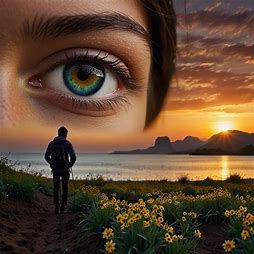